<a href="https://colab.research.google.com/github/aayushh04/dlt/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00


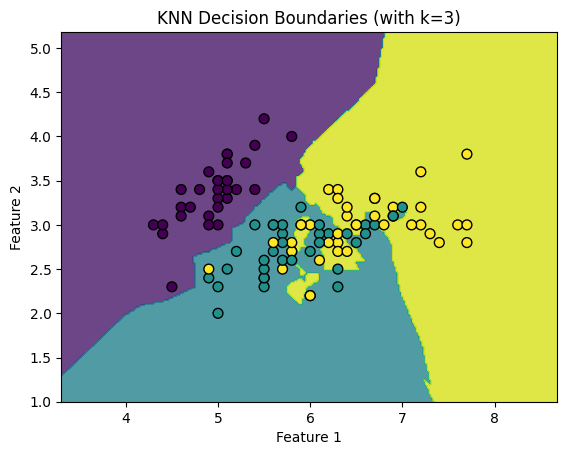

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create a KNN model with k=3 (you can experiment with different values of k)
knn = KNeighborsClassifier(n_neighbors=3)

# Step 5: Train the model
knn.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optionally, visualize the decision boundaries (if you'd like to plot)
# This is just for 2D visualization, so we can reduce the data to two features.
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

# Re-train on the 2D data
knn.fit(X_train_2D, y_train)

# Plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contours
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.title("KNN Decision Boundaries (with k=3)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
